In [1]:
from toolbox.env import *
import matplotlib.pyplot as plt
import gym

%matplotlib inline

Filed to import mujoco environment wrapper. This may because you didn't install mujoco_py.
Registed three environments: FourWay-v0, FourWayUseWalls-v0, FourWayUseWallsFixed-v0 in Gym.
Registed three environments: FourWay-v0, FourWayUseWalls-v0, FourWayUseWallsFixed-v0 in RLLib.
Registed three environments: FourWay-v0, FourWayUseWalls-v0, FourWayUseWallsFixed-v0 in RLLib.


In [2]:
def evaluate(policy):
    env = FourWayGridWorld({
        "use_walls": True, 
        "init_loc": [8.0, 8.0], 
        "left": 0, 
        "right": 100,
        "record_trajectory": True, 
        "early_done": True}
    )
    obs = env.reset()
    r = []
    while True:
        act = policy(obs)
        obs, rew, done, info = env.step(act)
        r.append(rew)
        if done:
            break
    return sum(r), {'env': env, 'reward': r}

In [3]:
import numpy as np

def toward(start, end):
    start = np.asarray(start)
    end = np.asarray(end)
    direction = end - start
    if max(abs(direction[0]), abs(direction[1])) > 1:
        direction = direction / max(abs(direction[0]), abs(direction[1]))
    return direction

def expert_up(obs):
    if obs[0] > 3.9 and obs[1] < 10.0:
        return toward(obs, [3.9, 10.0])
    else:
        return toward(obs, [8.0, 16.0])
    
def expert_down(obs):
    if obs[0] > 3.9 and obs[1] > 6.0:
        return toward(obs, [3.9, 6.0])
    else:
        return toward(obs, [8.0, 0.0])
    
def expert_left(obs):
    return toward(obs, [0.0, 8.0])

def expert_right(obs):
    x = obs[0]
    y = obs[1]
    
    if x > 3.9 and y <= 9.9 and x < 9:
        return toward(obs, [3.9, 9.9])
    elif x == 3.9 and y == 9.9:
        return toward(obs, [3.9, 10.1])
    elif x < 12.5 and y >= 10.0:
        return toward(obs, [12.5, 10.0])
    else:
        return toward(obs, [16.0, 8.0])


Building Walls!!!
Episode Reward:  98.29999997466803


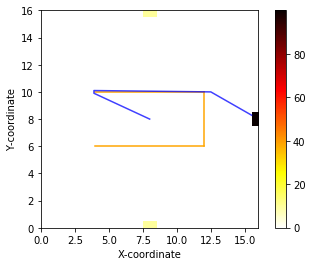

[-0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 100.0]

In [4]:
reward, info = evaluate(expert_right)
print("Episode Reward: ", reward)
info['env'].render()
info['reward']

Building Walls!!!
Episode Reward:  -0.7000000104308128


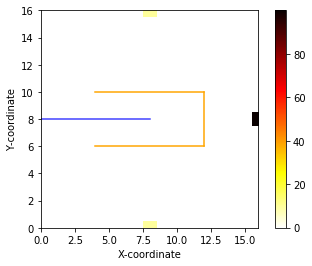

[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, 0.0]

In [5]:
reward, info = evaluate(expert_left)
print("Episode Reward: ", reward)
info['env'].render()
info['reward']
# info['env'].traj

Building Walls!!!
Episode Reward:  8.999999985098839


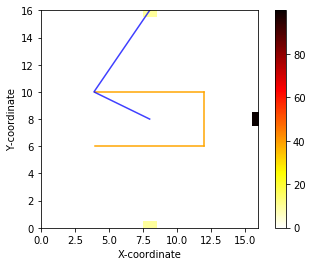

[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, 10.0]

In [6]:
reward, info = evaluate(expert_up)
print("Episode Reward: ", reward)
info['env'].render()
info['reward']
# info['env'].traj

Building Walls!!!
Episode Reward:  8.999999985098839


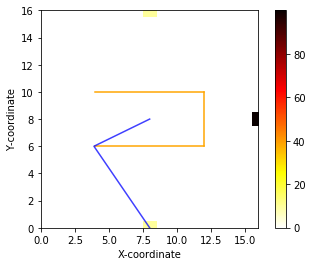

[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, 10.0]

In [7]:
reward, info = evaluate(expert_down)
print("Episode Reward: ", reward)
info['env'].render()
info['reward']
# info['env'].traj

Building Walls!!!
Episode Reward:  -3.200000047683716


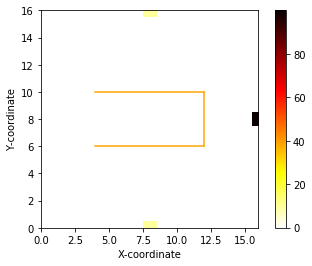

[-0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1]

In [8]:
reward, info = evaluate(lambda _: [0, 0])
print("Episode Reward: ", reward)
info['env'].render()
info['reward']
# info['env'].traj

In [9]:
expert = lambda _: [0.0, 0.0]
evaluate(expert)

Building Walls!!!


(-3.200000047683716,
 {'env': <toolbox.env.four_way.FourWayGridWorld at 0x129b58ef0>,
  'reward': [-0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1,
   -0.1]})

Building Walls!!!
Episode Reward:  -3.200000047683716


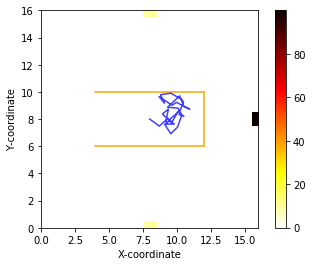

[array([8., 8.]),
 array([8.71410929, 7.48229652]),
 array([9.32738127, 8.04120384]),
 array([9.81237898, 7.63289037]),
 array([9.09701039, 7.62760245]),
 array([9.54966515, 6.92795243]),
 array([10.05383232,  7.40691584]),
 array([10.34692474,  8.26292694]),
 array([10.09381987,  8.80046359]),
 array([9.31910116, 8.87354163]),
 array([10.20464285,  9.7090832 ]),
 array([10.51970756,  8.92206244]),
 array([10.95019442,  8.73014809]),
 array([9.96317  , 9.2314406]),
 array([9.64982667, 9.01554812]),
 array([8.69006333, 9.65686285]),
 array([9.01548625, 9.27860573]),
 array([9.0802907 , 9.17739401]),
 array([8.79855382, 9.79276114]),
 array([9.55454947, 9.90267189]),
 array([9.55454947, 9.90267189]),
 array([10.38252968,  9.42814818]),
 array([10.49159722,  9.23656618]),
 array([10.23197147,  8.62355866]),
 array([9.55650489, 8.0534718 ]),
 array([9.20561505, 7.62240365]),
 array([9.23476832, 8.01218804]),
 array([9.37677908, 8.74032098]),
 array([8.94191298, 8.37653161]),
 array([9.6040

In [10]:
reward, info = evaluate(lambda _: np.random.uniform(size=[2,]) * 2 - 1)
print("Episode Reward: ", reward)
info['env'].render()
# info['reward']
info['env'].traj

Building Walls!!!
Episode Reward:  -2.600000038743019


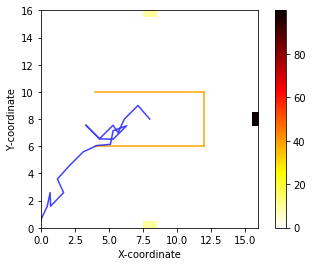

[array([8., 8.]),
 array([7.13733668, 9.        ]),
 array([7.13733668, 9.        ]),
 array([6.13733668, 8.        ]),
 array([5.67598414, 7.        ]),
 array([5.67598414, 7.        ]),
 array([5.67598414, 7.        ]),
 array([5.67598414, 7.        ]),
 array([5.67598414, 7.        ]),
 array([5.30787141, 7.54787572]),
 array([4.30787141, 6.54787572]),
 array([3.30787141, 7.54787572]),
 array([4.30787141, 6.54787572]),
 array([5.30787141, 6.51175879]),
 array([5.30787141, 6.51175879]),
 array([6.30787141, 7.51175879]),
 array([5.30787141, 7.14342374]),
 array([5.11368498, 6.14342374]),
 array([4.11368498, 6.05304803]),
 array([3.11368498, 5.58981937]),
 array([2.11368498, 4.58981937]),
 array([1.20836381, 3.58981937]),
 array([1.66649745, 2.58981937]),
 array([0.71027503, 1.58981937]),
 array([0.67336478, 2.58981937]),
 array([0.46459959, 1.58981937]),
 array([0.        , 0.58981937])]

In [13]:
reward, info = evaluate(lambda _: np.random.normal(size=[2,]) * 2 - 1)
print("Episode Reward: ", reward)
info['env'].render()
# info['reward']
info['env'].traj